In [1]:
# import
import pandas as pd
import numpy as np
from simple.chart import chartParallel, interactTable
from simple.funcs import vwap
from simple.geneopt import GridOpt
from simple.pretty import pp
from multiprocessing import current_process
from simple.backtest import getLong, getShort, getProfit, npBacktestLimit
import matplotlib.pyplot as plt

In [2]:
T = np.load('data/tick.npz')['BTCUSDT'].view(np.recarray)
len(T)

889360

In [3]:
# declare chart linestyles
line_styles = {
    'Tick': dict(color='gray', opacity=0.25),
    'Center': dict(color='blue', opacity=0.5),
    'qA': dict(color='red', opacity=0.5, dash='dot'),
    'qB': dict(color='green', opacity=0.5, dash='dot'),
    'Profit': dict(color='gray', width=3, opacity=0.4, secondary_y=True, shape='hv', connectgaps=True),
    'Buy': dict(mode='markers', color='green', symbol='triangle-up', size=10, line=dict(color="darkgreen", width=1)),
    'Sell': dict(mode='markers', color='red', symbol='triangle-down', size=10, line=dict(color="darkred", width=1))
}

In [4]:
def model(Period: int = (1000, 6000, 500), StdDev: float = (2, 3.8, 0.1)):
    if Period == 0 or StdDev == 0: return {}
    Tick = T.Price
    Center = vwap(T, Period)
    std = pd.Series(Tick).rolling(Period).std().bfill().values
    qA = Center + std * StdDev
    qB = Center - std * StdDev

    trades = npBacktestLimit(T, qA, qB)
    Buy, Sell = getLong(trades), getShort(trades)
    P = getProfit(trades)
    Profit = {'x': P.Index, 'y': P.Profit.cumsum()}

    return {
        'Profit': P.Profit.sum(),
        'Count': len(P),
        'AvgProfit': P.Profit.mean() if len(P) > 0 else 0,
        'Sharpe': P.Profit.sum() / P.Profit.std() if len(P) > 1 else 0
     } if current_process().daemon else locals()

In [5]:
# Genetic optimizer
G = GridOpt(model)
G.fullSearch()

  0%|          | 0/198 [00:00<?, ?it/s]

6000

In [6]:
# Grid results
G.report.sort_values('Profit', ascending=False)

,Period,StdDev,Profit,Count,AvgProfit,Sharpe
154,5000,3.0,5468.719322,23,237.770405,7.852688
155,5000,3.1,4885.950570,15,325.730038,5.832675
176,5500,3.4,3491.409740,5,698.281948,3.472280
194,6000,3.4,3057.979287,5,611.595857,3.367347
175,5500,3.3,2641.320918,7,377.331560,3.035139
...,...,...,...,...,...,...
54,2500,2.0,-11367.381160,188,-60.464793,-48.055208
3,1000,2.3,-11496.997795,336,-34.217255,-71.753691
2,1000,2.2,-12032.443642,390,-30.852420,-80.144623
1,1000,2.1,-13208.130926,435,-30.363519,-92.886435


In [7]:
p = G.report.pivot(columns='Period', index='StdDev', values='Profit')

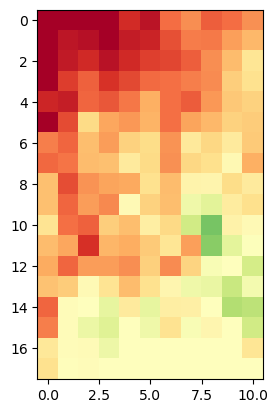

In [8]:
h = 10000
plt.imshow(p, cmap='RdYlGn', vmin=-h, vmax=h);

In [9]:
pp(p.iloc[::3], float_format='{:,.0f}')

Period,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000
StdDev,,,,,,,,,,,
2.000000,"-16,005","-10,002","-9,948","-11,367","-8,165","-9,120","-5,968","-4,968","-6,471","-5,946","-4,855"
2.300000,"-11,497","-7,509","-6,340","-7,940","-7,149","-6,043","-5,863","-5,468","-5,014","-2,677","-1,805"
2.600000,"-5,417","-6,191","-3,289","-4,455","-2,564","-2,094","-4,784","-1,358","-2,307","-1,260","-2,844"
2.900000,"-3,210","-6,202","-4,482","-5,129",-390,"-2,554","-3,323",789,"1,472","-1,239","-1,894"
3.200000,"-4,028","-6,249","-4,465","-4,456","-4,932","-2,646","-5,019","-2,474",363,21,"2,141"
3.500000,"-5,402",-213,965,"1,591",0,823,"-1,790",375,-614,28,"2,299"


In [10]:
# results browser
interactTable(model, G.report.set_index('Period'), height=600, **line_styles)

In [11]:
chartParallel(G.report.set_index('Period'))

FigureWidget({
    'data': [{'dimensions': [{'label': 'Period',
                              'range': [1000, 6000],
                              'values': array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
                                               1000, 1000, 1000, 1000, 1000, 1000, 1500, 1500, 1500, 1500, 1500, 1500,
                                               1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500,
                                               2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
                                               2000, 2000, 2000, 2000, 2000, 2000, 2500, 2500, 2500, 2500, 2500, 2500,
                                               2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
                                               3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000,
                                               300